In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
model_type = ['random','imagenet_noface', 'imagenet_oneface',
'imagenet_vggface', 'vggface_oneobject', 'vggface']


seed = 1
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
results_dir = f'{curr_dir}/results'
suf = '_unsupervised'

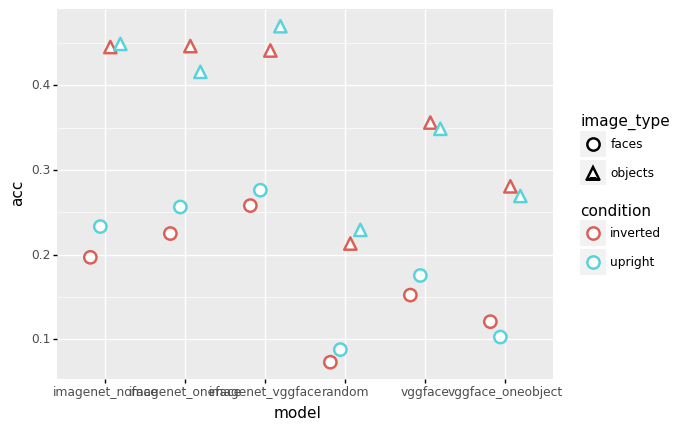

In [32]:
"""
Plot classification mean data
"""
exp = 'classify'
summary_df = pd.DataFrame(columns = ['model','image_type', 'condition', 'acc', 'se'])

cond = ['upright','inverted']
test_type = ['objects', 'faces']

for mm in model_type:
    for tt in test_type:
        for cc in cond:
            curr_df = pd.read_csv(f'{results_dir}/{exp}/cornet_z_{mm}_{tt}_{cc}{suf}.csv')
            curr_data = pd.Series([mm,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                    index = summary_df.columns)
            summary_df = summary_df.append(curr_data, ignore_index=True)

            #summary_df = pd.concat([summary_df, curr_data])
summary_df['acc'] = summary_df['acc'].astype(float)

#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))

plot = ggplot(summary_df, aes(x = 'model', y = 'acc', color = 'condition')) + \
geom_linerange(aes(x='model',  ymax = 'acc + se', ymin = 'acc - see', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5))

print(plot)

In [21]:
summary_df


,model,image_type,condition,acc,se
0,random,objects,upright,0.229144,0.003102
1,random,objects,inverted,0.213001,0.002874
2,random,faces,upright,0.087603,0.006185
3,random,faces,inverted,0.072727,0.006073
4,imagenet_noface,objects,upright,0.448971,0.004019
5,imagenet_noface,objects,inverted,0.445287,0.002698
6,imagenet_noface,faces,upright,0.233058,0.008428
7,imagenet_noface,faces,inverted,0.196694,0.008013
8,imagenet_oneface,objects,upright,0.415926,0.002578
9,imagenet_oneface,objects,inverted,0.446371,0.004914


In [14]:
summary_df.columns

Index(['model', 'image_type', 'condition', 'acc', 'se'], dtype='object')